In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/adult_income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#Handling Missing Values

In [ ]:
df["workclass"].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
2799/48842

0.05730723557593874

In [ ]:
df["occupation"].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [ ]:
2809/48842

0.05751197739650301

In [ ]:
df["native-country"].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [ ]:
857/48802

0.01756075570673333

The three columns that we looked at above have "?" for some of the observations, which likely represent missing data. Since the percent of missing values from these columns are below 6% of the data, we will continue by replacing "?" with NaN and dropping the missing values from the dataset. We believe that removing the observation with missing values is the best decision now because the data is so large that it would not impact analysis.

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.dropna()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
45222/48842

0.9258834609557348

We still have over 90% of the data for analysis.

#Feature Selection

After looking at the data, we observed that the columns educational-num and education provide us with the same information, so we chose to keep educational-num for easier numerical data anlysis.

In [ ]:
# Drop redundant 'education' column (keep education-num)
df.drop(columns=['education'], inplace=True)
df

<ipython-input-69-853c14acf1a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['education'], inplace=True)


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Encode target variable
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df

<ipython-input-70-d4f7db27e49b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


#Exploratory Data Analysis (EDA)

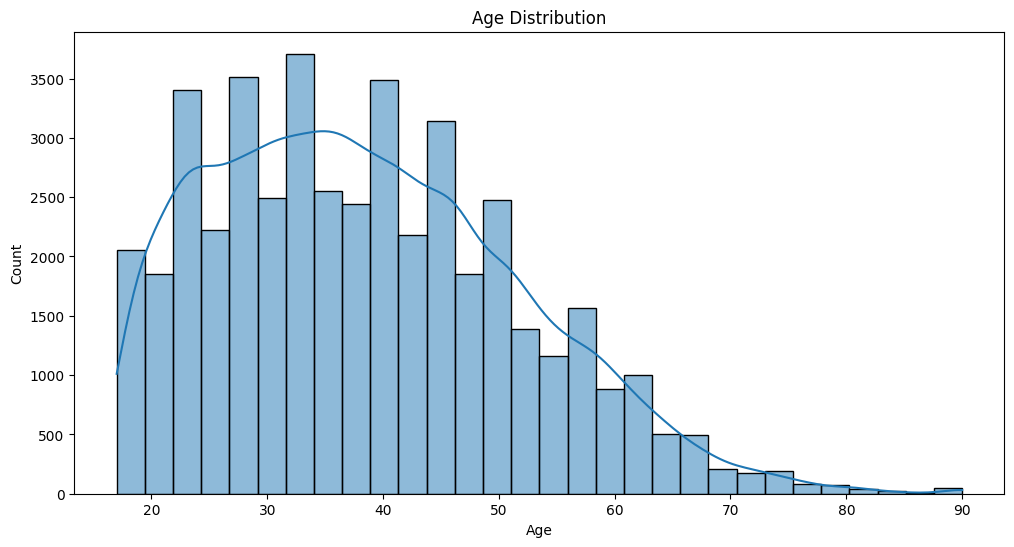

In [ ]:
# 1. Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

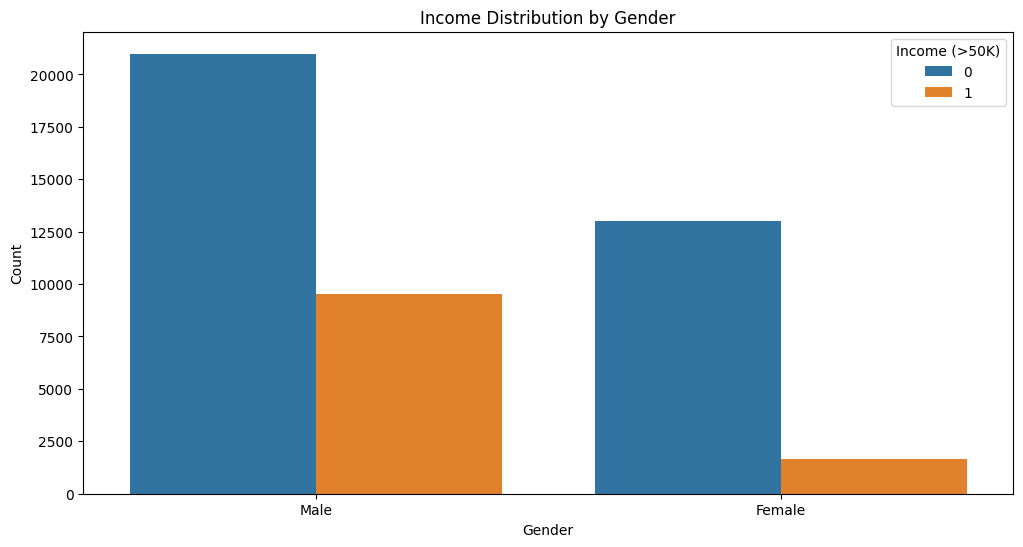

In [ ]:
# 2. Income distribution by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income (>50K)')
plt.show()

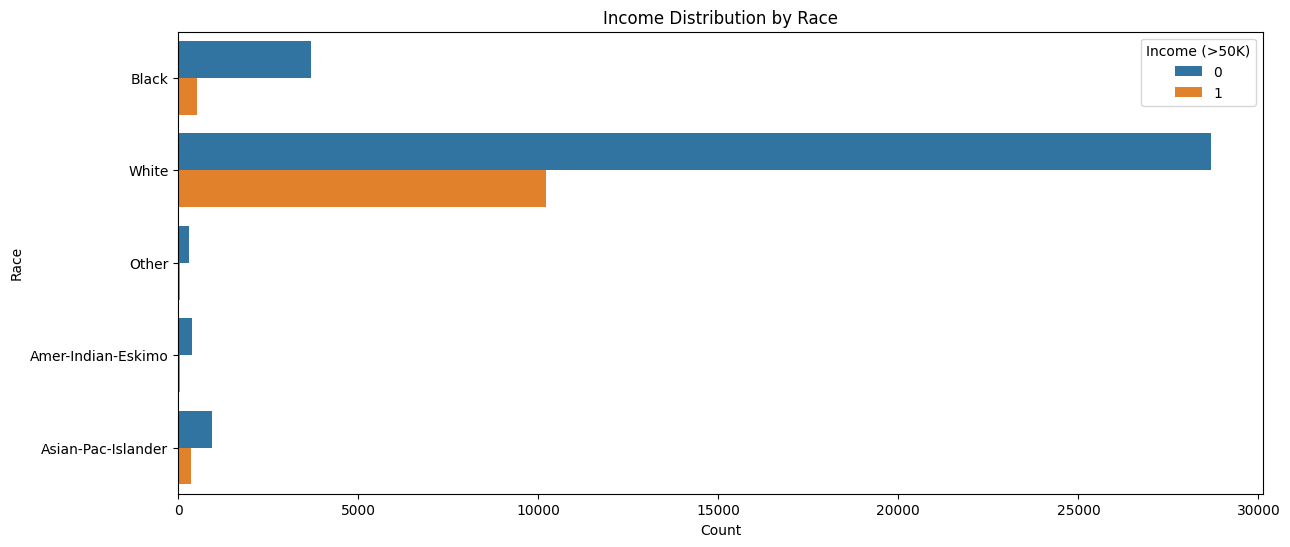

In [ ]:
# 3. Income distribution by race
plt.figure(figsize=(14, 6))
sns.countplot(y='race', hue='income', data=df)
plt.title('Income Distribution by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.legend(title='Income (>50K)')
plt.show()

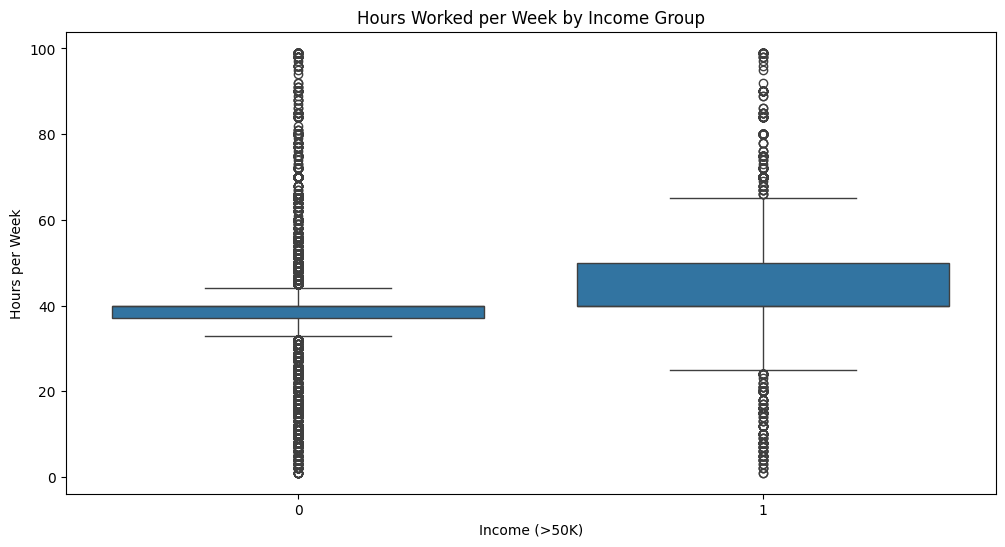

In [ ]:
# 4. Boxplot of hours-per-week grouped by income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked per Week by Income Group')
plt.xlabel('Income (>50K)')
plt.ylabel('Hours per Week')
plt.show()

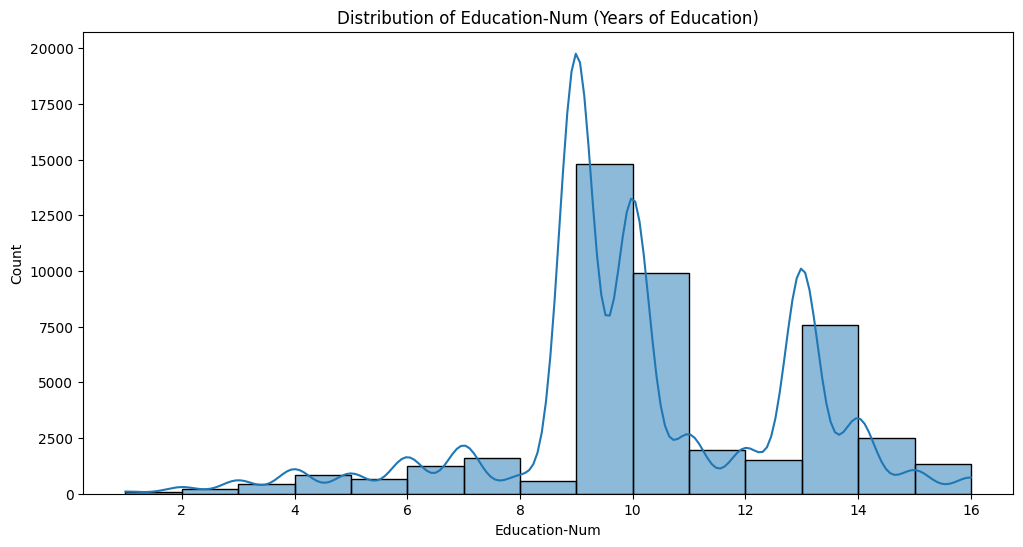

In [ ]:
# 5. Distribution of education-num (years of education)
plt.figure(figsize=(12, 6))
sns.histplot(df['educational-num'], bins=15, kde=True)
plt.title('Distribution of Education-Num (Years of Education)')
plt.xlabel('Education-Num')
plt.ylabel('Count')
plt.show()

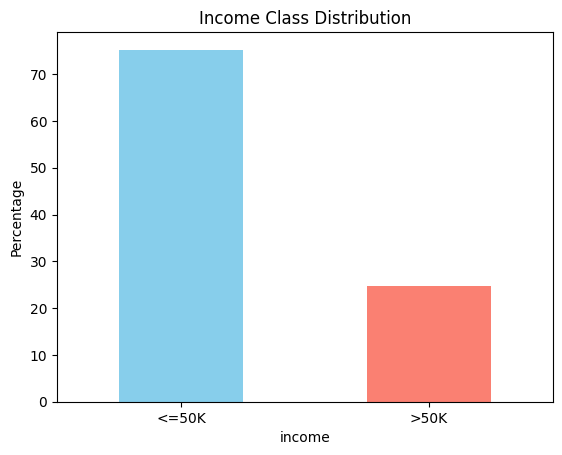

In [ ]:
# 6. Check for class imbalance in income
class_counts = df['income'].value_counts(normalize=True) * 100
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Income Class Distribution')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'], rotation=0)
plt.ylabel('Percentage')
plt.show()

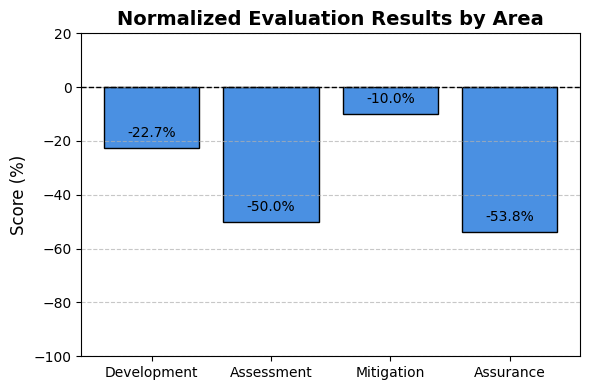

In [ ]:
#Chart for Results Section

import matplotlib.pyplot as plt
import pandas as pd

area_scores = {"Development": -5, "Assessment": -5, "Mitigation": -1, "Assurance": -7}

area_totals = {"Development": 22, "Assessment": 10, "Mitigation": 10, "Assurance": 13}

# Calculate percentage scores
area_percentages = {area: (score / total) * 100 for area, (score, total) in zip(area_scores.keys(), zip(area_scores.values(), area_totals.values()))}

# Create DataFrame
df = pd.DataFrame(list(area_percentages.items()), columns=["Area", "Percentage Score"])

# Plotting with decimal labels
plt.figure(figsize=(6, 4))
bars = plt.bar(df["Area"], df["Percentage Score"], color='#4A90E2', edgecolor='black')
plt.title("Normalized Evaluation Results by Area", fontsize=14, fontweight='bold')
plt.ylabel("Score (%)", fontsize=12)
plt.ylim(-100, 20)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels above bars with one decimal place
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + (3 if yval < 0 else 2), f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()
